# Titanic Data Analysis

### Introduction to Data Set & Analysis

The Titanic data set contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The most important variable is the binary variable "Survived", with 1 indicating that this passenger survived and 0 indicating otherwise. Other variables, such as sex, group and fare, might be useful in prerdicting the survival of that passenger.

First, I would like to brainstorm a serial of question regarding this data set.

1. How many percentage of people survived?
2. What are the summary statistics of passenger class, sex, age,  number of siblings/spouses abroad, number of parents/children abroad, passenger fare, port of embarkation?
3. What factors determine the likelihood of survival?
4. We have all heard of the saying "Women and children first." Are women and children more likely to survived?
5. Are people with higher fare more likely to survive? What about people with higher passenger class?
6. Are people with big family more or less likely to survive?

In [43]:
# Import packages

import numpy as np 
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [10]:
import os
os.getcwd()

'/Users/xiangli/Downloads'

In [16]:
# Import data and discplay the first few rows

titanic = pd.read_csv('/Users/xiangli/Desktop/bootcamp/Udacity Nanodegree/P2/data set/titanic-train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Wrangling Process

During the data wrangling process, I want to take a close look at the data set and make changes to data type and missing value when neccessary. After we clean the data set, our model will generate more accurate results.

In [25]:
# Exam missing value in Survived

survived_is_null = pd.isnull(titanic['Survived'])
sum(survived_is_null)

0

In [27]:
# Exam missing value in Pclass

pclass_is_null = pd.isnull(titanic['Pclass'])
sum(pclass_is_null)

0

In [28]:
# Exam missing value in Name

name_is_null = pd.isnull(titanic['Name'])
sum(name_is_null)

0

In [29]:
# Exam missing value in Sex

sex_is_null = pd.isnull(titanic['Sex'])
sum(sex_is_null)

0

In [30]:
# Exam missing value in Age

age_is_null = pd.isnull(titanic['Age'])
sum(age_is_null)

177

In [31]:
# Exam missing value in SibSp

sibsp_is_null = pd.isnull(titanic['SibSp'])
sum(sibsp_is_null)

0

In [32]:
# Exam missing value in Parch

parch_is_null = pd.isnull(titanic['Parch'])
sum(parch_is_null)

0

In [33]:
# Exam missing value in Ticket

ticket_is_null = pd.isnull(titanic['Ticket'])
sum(ticket_is_null)

0

In [34]:
# Exam missing value in Fare

fare_is_null = pd.isnull(titanic['Fare'])
sum(fare_is_null)

0

In [35]:
# Exam missing value in Cabin

cabin_is_null = pd.isnull(titanic['Cabin'])
sum(cabin_is_null)

687

In [36]:
# Exam missing value in Embarked

embarked_is_null = pd.isnull(titanic['Embarked'])
sum(embarked_is_null)

2

As we can see, age is missing 177 data points, cabin is missing 687 data points and embarked is missing 2 data points.

Since cabin is missing 687 out of 891 data points, the best solution is perhaps just to exclude this variable in our analysis.

Embarked is only missing 2 data points, therefore we can make some educated guesses and replace these missing values with the mode. We could also drop this entire variable or drop these 2 data points, but then we will lose the value provided from this variable or other variables of these data points. In my opinion, it is worthwhile to estimate these 2 embarked value if we can gain other values. 

Lastly, we need to do something clever with the 177 missing age variable, since age seems like an important variable. But first, let's go ahead and drop the cabin variable and drop the 2 rows with missing embarked values.

In [109]:
# Drop the cabin variable

titanic_clean1 = titanic.drop(['Cabin'], axis = 1)

In [111]:
# Drop the 2 data points with missing embarked values

titanic_clean2 = titanic_clean1[pd.notnull(titanic_clean1['Embarked'])]

In [112]:
# Display the first few rows of the new cleaning data set to make sure data was cleaned appropriately
titanic_clean2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


To figure out how to best estimate age for the 177 missing values, let's first look at the distribution of age.

In [122]:
# Assign varible to age

var_age = titanic_clean2.Age

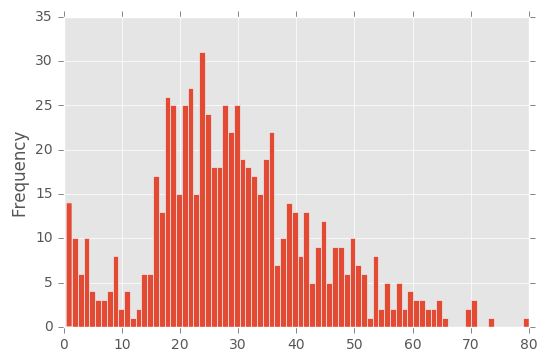

In [123]:
# Exam the distribution of age - histogram

var_age.plot.hist(bins = 80)

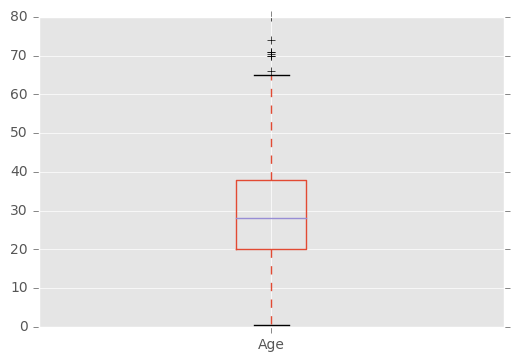

In [124]:
# Exam the distribution of age - boxplot

var_age.plot.box()

With the histogram and boxplot of age in hand, let's look at the summary statistics.

In [125]:
# Summary statistics of age 

var_age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

Oops, looks like we are gettting NaN for our summary statistics. I suspect that this is due to missing values. I will run the summary statistics again without the missing values.

In [127]:
# Summary statistics of age excluding missing values

var_age_no_missing = var_age[~numpy.isnan(var_age)]

var_age_no_missing.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The median age is 28-year old. One of the ways to replace the missing age values are to replace all of them with the median - 28. I will go ahead with this approach for now.

In [149]:
# Fill in missing age value with median

titanic_clean2['Age'].fillna(28, inplace = True)

In [152]:
# Display the clean data set with no missing values
titanic_clean2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


### Data Exploration Process

Now we have a clean data set to work with. We can start the data exploration process and begin answering the questions proposed earlier.

Question 1: 
How many percentage of people survived?

In [160]:
survived_pa = titanic_clean2.Survived

0.0


In [161]:
sum(survived_pa)

340

In [163]:
num_row = len(titanic_clean2)
print num_row

889


In [165]:
# Calculate the percentage survived
print sum(survived_pa) * 100 / num_row 

38


According to our calculation on the cleaned data set, 38% of passengers survived.

Question 2: 
What are the summary statistics of passenger class, sex, age, number of siblings/spouses abroad, number of parents/children abroad, passenger fare, port of embarkation?

In this question, notice we excluded passenger id because it's just an identifier and doesn't provide much value to the analysis other than being a label. We excluded name because it's a string variable and would be hard to summarize. We excluded ticket because it appears to be strings and kind of random. We also excluded cabin earlier due to too many missing values.

In [166]:
# Summary statistics for passenger class

titanic_clean2.Pclass.describe()

count    889.000000
mean       2.311586
std        0.834700
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [169]:
# Summary statistics for sex

titanic_clean2.Sex.describe()

count      889
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [170]:
# Summary statistics for age

titanic_clean2.Age.describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [174]:
# Summary statistics for number of siblings/spouses abroad

titanic_clean2.SibSp.describe()

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [171]:
# Summary statistics for number of parents/children abroad

titanic_clean2.Parch.describe()

count    889.000000
mean       0.524184
std        1.103705
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [172]:
# Summary statistics for passenger fare

titanic_clean2.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [173]:
# Summary statistics for port of embarkation

titanic_clean2.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Question 2: What factors determine the likelihood of survival?

First, I will approach this question using a decision tree model.

In [176]:
# Import 'sklearn' package
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.externals.six import StringIO

In [223]:
titanic_clean2.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked'],
      dtype='object')

In [226]:
X = titanic_clean2[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [227]:
print X.head()

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S


In [230]:
dt = tree.DecisionTreeClassifier()
Y = titanic_clean2[['Survived']]

In [231]:
dt.fit[X, Y]

TypeError: 'instancemethod' object has no attribute '__getitem__'